Student performance indicator 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import dataset 
df = pd.read_csv('/Users/anuhyasamudrala/Documents/Anu_uncc/mlproject/notebook/data/stud.csv')

In [11]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

In [13]:
#cheking for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
#checking for data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight :
All the numerical data mean seems to be close to each other 
even std is also close (14-15)
overall min is 0 for math , whereas 10 for writing score but 17 for reading_score

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print('Categorical values in gender:' , df['gender'].unique() )
print('Categorical values in race_ethnicity:' , df['race_ethnicity'].unique() )
print('Categorical values in parental_level_of_education:' , df['parental_level_of_education'].unique() )
print('Categorical values in lunch:' , df['lunch'].unique() )
print('Categorical values in test_preparation_course:' , df['test_preparation_course'].unique() )

Categorical values in gender: ['female' 'male']
Categorical values in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical values in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical values in lunch: ['standard' 'free/reduced']
Categorical values in test_preparation_course: ['none' 'completed']


In [22]:
#change categorical values to numerical values
numeric_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('we have {}: numeric features'.format(len(numeric_feature)))
print('we have {}: categorical features'.format(len(cat_feature)))


we have 5: numeric features
we have 3: categorical features


In [24]:
#create avg score column
df['average']= df[['math_score','reading_score','writing_score']].mean(axis=1)
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score    average  
0                    none          72             72             74  72.666667  
1               completed          69             90             88  82.333333  
2                    none          90             95             93  92.666667  
3                    none          47             57             44  49.333333  
4                    none          76             78             75  76.333333  


<Axes: xlabel='average', ylabel='Count'>

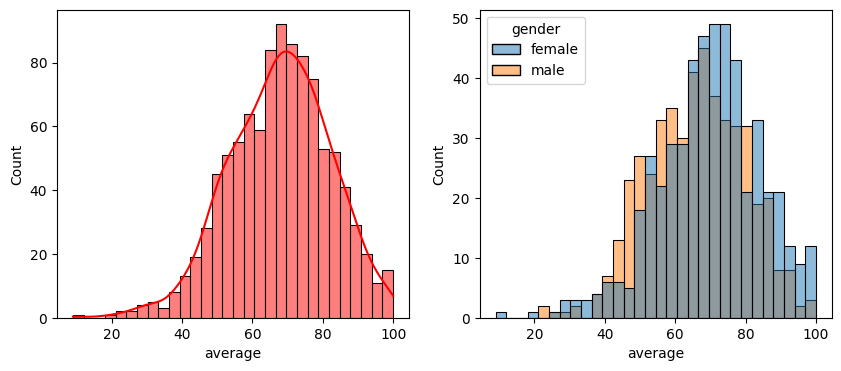

In [33]:
#Visualizations
#need to visualize average score to make conclusion (based on gender and total score))

fig,ax = plt.subplots(1,2 , figsize = (10,4))
plt.subplot(121)
sns.histplot(data = df , x = 'average' , bins = 30 ,kde = True , color = 'red')
plt.subplot(122)
sns.histplot(data = df , x = 'average' , bins = 30 , hue = 'gender')

Insight : Female student tend to perform good than male

<Axes: xlabel='average', ylabel='Count'>

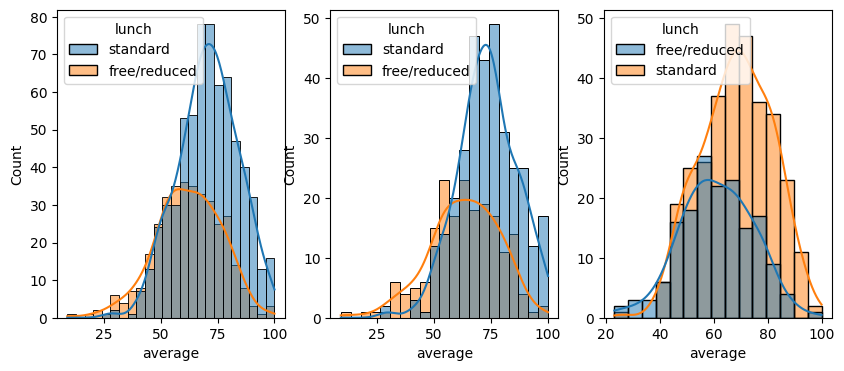

In [38]:
fig,ax = plt.subplots(1,3 , figsize = (10,4))
plt.subplot(131)
sns.histplot(data = df , x = 'average' ,kde = True  , hue='lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female' ], x = 'average' , kde = True  , hue='lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' ,kde = True  , hue='lunch')


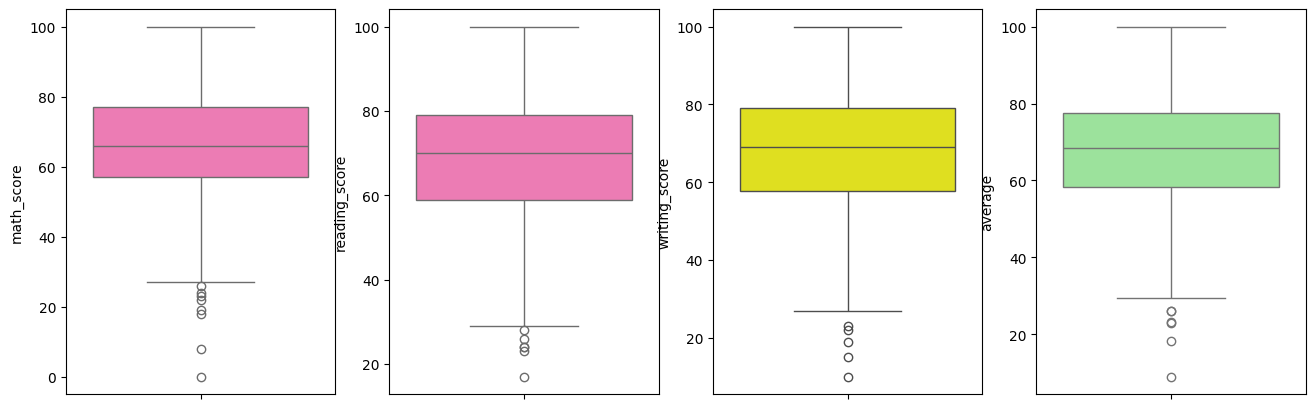

In [44]:
#Checking Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='hotpink')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()